In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/CSE 544/Project

/content/drive/.shortcut-targets-by-id/1lXbC5kz-bpRK1KhVbQcOXiadzkHz5s1e/CSE 544/Project


In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Part 1: Data preprocessing
##1.1 data cleaning

In [40]:
vaccination_data=pd.read_csv("data/COVID-19_Vaccinations_in_the_United_States_Jurisdiction.csv")
case_data=pd.read_csv("data/United_States_COVID-19_Cases_and_Deaths_by_State_over_Time.csv")
AZ_vaccine=vaccination_data[vaccination_data["Location"]=='AZ']
AL_vaccine=vaccination_data[vaccination_data["Location"]=='AL']
AZ_case=case_data[case_data["state"]=='AZ']
AL_case=case_data[case_data["state"]=='AL']

AZ_vaccine1=AZ_vaccine.copy()
AZ_case1=AZ_case.copy()
AL_case1=AL_case.copy()
AL_vaccine1=AL_vaccine.copy()

In [41]:
vaccination_data.head()

,Date,MMWR_week,Location,Distributed,Distributed_Janssen,Distributed_Moderna,Distributed_Pfizer,Distributed_Unk_Manuf,Dist_Per_100K,Distributed_Per_100k_12Plus,...,Administered_Dose1_Recip_5PlusPop_Pct,Series_Complete_5Plus,Series_Complete_5PlusPop_Pct,Administered_5Plus,Admin_Per_100k_5Plus,Distributed_Per_100k_5Plus,Series_Complete_Moderna_5Plus,Series_Complete_Pfizer_5Plus,Series_Complete_Janssen_5Plus,Series_Complete_Unk_Manuf_5Plus
0,05/07/2022,18,MH,106880,12600,57000,37280,0,137482,186303,...,49.3,27343.0,39.5,66097.0,95519.0,154455.0,20308.0,4246.0,2786.0,3.0
1,05/07/2022,18,IN,13539880,609400,4761000,8169480,0,201121,237332,...,65.6,3694390.0,58.5,9560655.0,151423.0,214446.0,1255229.0,2148868.0,281749.0,8544.0
2,05/07/2022,18,IA,6685455,290700,2587520,3807235,0,211896,249804,...,72.5,1956419.0,66.1,5137024.0,173581.0,225903.0,716645.0,1075938.0,163419.0,417.0
3,05/07/2022,18,CA,90875355,3725900,32629280,54520175,0,229993,270090,...,89.2,28482276.0,76.7,75378465.0,203020.0,244759.0,9758182.0,16617901.0,2101031.0,5162.0
4,05/07/2022,18,WA,17954795,761000,6524000,10669795,0,235785,276188,...,86.0,5532025.0,77.3,14531490.0,202999.0,250821.0,1901762.0,3172819.0,453064.0,4380.0


In [42]:
AZ_case1['submission_date'] = pd.to_datetime(AZ_case1['submission_date'])
AL_case1['submission_date'] = pd.to_datetime(AL_case1['submission_date'])
AZ_case1=AZ_case1.sort_values(by="submission_date")
AL_case1=AL_case1.sort_values(by="submission_date")

AZ_vaccine1['Date'] = pd.to_datetime(AZ_vaccine1['Date'])
AL_vaccine1['Date'] = pd.to_datetime(AL_vaccine1['Date'])
AZ_vaccine1=AZ_vaccine1.sort_values(by="Date")
AL_vaccine1=AL_vaccine1.sort_values(by="Date")

AZ_vaccine1.reset_index(inplace=True,drop=True)
AL_vaccine1.reset_index(inplace=True,drop=True)
AZ_case1.reset_index(inplace=True,drop=True)
AL_case1.reset_index(inplace=True,drop=True)



## 1.1 Data preprocessing for case data

In [43]:
AZ_begin=AZ_case1[AZ_case1["submission_date"]==pd.Timestamp('2020-05-01')].index[0]
AZ_case_cut = AZ_case1.iloc[AZ_begin:]



AL_begin=AL_case1[AL_case1["submission_date"]==pd.Timestamp('2020-05-01')].index[0]
AL_case_cut = AL_case1.iloc[AL_begin:]
AZ_case_cut.reset_index(inplace=True,drop=True)
AL_case_cut.reset_index(inplace=True,drop=True)
AZ_data=AZ_case_cut[["submission_date","new_case","pnew_case","new_death","pnew_death"]]
AL_data=AL_case_cut[["submission_date","new_case","pnew_case","new_death","pnew_death"]]
AL_data


,submission_date,new_case,pnew_case,new_death,pnew_death
0,2020-05-01,254,1.0,18,0.0
1,2020-05-02,260,0.0,12,1.0
2,2020-05-03,278,1.0,20,1.0
3,2020-05-04,225,2.0,19,1.0
4,2020-05-05,317,3.0,25,0.0
...,...,...,...,...,...
731,2022-05-02,324,163.0,0,0.0
732,2022-05-03,340,119.0,0,0.0
733,2022-05-04,334,135.0,0,0.0
734,2022-05-05,242,47.0,8,3.0


Delete negative values

In [55]:
AZ_data.drop(AZ_data[AZ_data["new_death"]<0].index,inplace=True)
AL_data.drop(AL_data[AL_data["new_death"]<0].index,inplace=True)
AZ_data.drop(AZ_data[AZ_data["new_case"]<0].index,inplace=True)
AL_data.drop(AZ_data[AZ_data["new_case"]<0].index,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [56]:
AL_data[AL_data["new_death"]<0]

,submission_date,new_case,pnew_case,new_death,pnew_death


tot-prob=conf<br>
tot2-tot1=new<br>
prob2-prob1=pnew

In [57]:
AZ_case_cut.isnull().any()

submission_date    False
state              False
tot_cases          False
conf_cases         False
prob_cases         False
new_case           False
pnew_case          False
tot_death          False
conf_death         False
prob_death         False
new_death          False
pnew_death         False
created_at         False
consent_cases      False
consent_deaths     False
dtype: bool

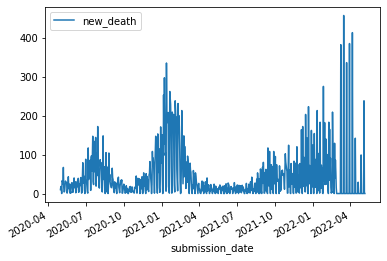

In [58]:
AZ_data.plot(x='submission_date',y='new_death')

### 1.1.1 Tukey outilier detection

In [59]:
AZ_Q1 = int(np.ceil(0.25*len(AZ_data)))
AZ_Q3 = int(np.ceil(0.75*len(AZ_data)))
print(f"AZ_Q1={AZ_Q1}\nAZ_Q3={AZ_Q3}")
AL_Q1 = int(np.ceil(0.25*len(AL_data)))
AL_Q3 = int(np.ceil(0.75*len(AL_data)))
print(f"AL_Q1={AL_Q1}\nAL_Q3={AL_Q3}")

AZ_Q1=179
AZ_Q3=537
AL_Q1=184
AL_Q3=552


In [102]:
AZ_sort_new_case=AZ_data.sort_values(by="new_case")
AZ_sort_new_case.reset_index(inplace=True,drop=True)
IQR=AZ_sort_new_case["new_case"].iloc[AZ_Q3-1]-AZ_sort_new_case["new_case"].iloc[AZ_Q1-1]
low = AZ_sort_new_case["new_case"].iloc[AZ_Q1-1]-1.5*IQR
high= AZ_sort_new_case["new_case"].iloc[AZ_Q3-1]+1.5*IQR
print(f"AZ_new_case:\nlow={low}\nhigh={high}\nIQR={IQR}")
AZ_new_case_data=AZ_sort_new_case[["submission_date","new_case"]][AZ_sort_new_case["new_case"]<high]
AZ_new_case_data=AZ_new_case_data[["submission_date","new_case"]][AZ_new_case_data["new_case"]>low]
AZ_new_case_data=AZ_new_case_data.sort_values(by="submission_date")
AZ_new_case_data.reset_index(inplace=True,drop=True)
AZ_new_case_data.to_csv("data/cleaned_data/AZ_new_case.csv",index=False)
print(f"outlier number:{len(AZ_sort_new_case)-len(AZ_new_case_data)}\n")

AZ_sort_pnew_case=AZ_data.sort_values(by="pnew_case")
AZ_sort_pnew_case.reset_index(inplace=True,drop=True)
IQR=AZ_sort_pnew_case["pnew_case"].iloc[AZ_Q3-1]-AZ_sort_pnew_case["pnew_case"].iloc[AZ_Q1-1]
low = AZ_sort_pnew_case["pnew_case"].iloc[AZ_Q1-1]-1.5*IQR
high= AZ_sort_pnew_case["pnew_case"].iloc[AZ_Q3-1]+1.5*IQR
print(f"AZ_pnew_case:\nlow={low}\nhigh={high}\nIQR={IQR}")
AZ_pnew_case_data=AZ_sort_pnew_case[["submission_date","pnew_case"]][AZ_sort_pnew_case["pnew_case"]<high]
AZ_pnew_case_data=AZ_pnew_case_data[["submission_date","pnew_case"]][AZ_pnew_case_data["pnew_case"]>low]
AZ_pnew_case_data=AZ_pnew_case_data.sort_values(by="submission_date")
AZ_pnew_case_data.reset_index(inplace=True,drop=True)
AZ_pnew_case_data.to_csv("data/cleaned_data/AZ_pnew_case.csv",index=False)
print(f"outlier number:{len(AZ_sort_pnew_case)-len(AZ_pnew_case_data)}\n")




AZ_sort_new_death=AZ_data.sort_values(by="new_death")
AZ_sort_new_death.reset_index(inplace=True,drop=True)
IQR=AZ_sort_new_death["new_death"].iloc[AZ_Q3-1]-AZ_sort_new_death["new_death"].iloc[AZ_Q1-1]
low = AZ_sort_new_death["new_death"].iloc[AZ_Q1-1]-1.5*IQR
high= AZ_sort_new_death["new_death"].iloc[AZ_Q3-1]+1.5*IQR
print(f"AZ_new_death:\nlow={low}\nhigh={high}\nIQR={IQR}")
AZ_new_death_data=AZ_sort_new_death[["submission_date","new_death"]][AZ_sort_new_death["new_death"]<high]
AZ_new_death_data=AZ_new_death_data[["submission_date","new_death"]][AZ_new_death_data["new_death"]>low]
AZ_new_death_data=AZ_new_death_data.sort_values(by="submission_date")
AZ_new_death_data.reset_index(inplace=True,drop=True)
AZ_new_death_data.to_csv("data/cleaned_data/AZ_new_death.csv",index=False)
print(f"outlier number:{len(AZ_sort_new_death)-len(AZ_new_death_data)}\n")




AZ_sort_pnew_death=AZ_data.sort_values(by="pnew_death")
AZ_sort_pnew_death.reset_index(inplace=True,drop=True)
IQR=AZ_sort_pnew_death["pnew_death"].iloc[AZ_Q3-1]-AZ_sort_pnew_death["pnew_death"].iloc[AZ_Q1-1]
low = AZ_sort_pnew_death["pnew_death"].iloc[AZ_Q1-1]-1.5*IQR
high= AZ_sort_pnew_death["pnew_death"].iloc[AZ_Q3-1]+1.5*IQR
print(f"AZ_pnew_death:\nlow={low}\nhigh={high}\nIQR={IQR}")
AZ_pnew_death_data=AZ_sort_pnew_death[["submission_date","pnew_death"]][AZ_sort_pnew_death["pnew_death"]<high]
AZ_pnew_death_data=AZ_pnew_death_data[["submission_date","pnew_death"]][AZ_pnew_death_data["pnew_death"]>low]
AZ_pnew_death_data=AZ_pnew_death_data.sort_values(by="submission_date")
AZ_pnew_death_data.reset_index(inplace=True,drop=True)
AZ_pnew_death_data.to_csv("data/cleaned_data/AZ_pnew_death.csv",index=False)
print(f"outlier number:{len(AZ_sort_pnew_death)-len(AZ_pnew_death_data)}\n")

AZ_new_case:
low=-1797.0
high=4163.0
IQR=1490
outlier number:123

AZ_pnew_case:
low=-204.0
high=348.0
IQR=138.0
outlier number:217

AZ_new_death:
low=-32.0
high=56.0
IQR=22
outlier number:172

AZ_pnew_death:
low=-1.5
high=2.5
IQR=1.0
outlier number:317



In [100]:
AL_sort_new_case=AL_data.sort_values(by="new_case")
AL_sort_new_case.reset_index(inplace=True,drop=True)
IQR=AL_sort_new_case["new_case"].iloc[AZ_Q3-1]-AL_sort_new_case["new_case"].iloc[AZ_Q1-1]
low = AL_sort_new_case["new_case"].iloc[AL_Q1-1]-1.5*IQR
high= AL_sort_new_case["new_case"].iloc[AL_Q3-1]+1.5*IQR
print(f"AL_new_case:\nlow={low}\nhigh={high}\nIQR={IQR}")
AL_new_case_data=AL_sort_new_case[["submission_date","new_case"]][AL_sort_new_case["new_case"]<high]
AZ_new_case_data=AL_new_case_data[["submission_date","new_case"]][AL_new_case_data["new_case"]>low]
AL_new_case_data=AL_new_case_data.sort_values(by="submission_date")
AL_new_case_data.reset_index(inplace=True,drop=True)
AL_new_case_data.to_csv("data/cleaned_data/AL_new_case.csv",index=False)
print(f"outlier number:{len(AL_sort_new_case)-len(AL_new_case_data)}\n")

AL_sort_pnew_case=AL_data.sort_values(by="pnew_case")
AL_sort_pnew_case.reset_index(inplace=True,drop=True)
IQR=AL_sort_pnew_case["pnew_case"].iloc[AL_Q3-1]-AL_sort_pnew_case["pnew_case"].iloc[AZ_Q1-1]
low = AL_sort_pnew_case["pnew_case"].iloc[AL_Q1-1]-1.5*IQR
high= AL_sort_pnew_case["pnew_case"].iloc[AL_Q3-1]+1.5*IQR
print(f"AL_pnew_case:\nlow={low}\nhigh={high}\nIQR={IQR}")
AL_pnew_case_data=AL_sort_pnew_case[["submission_date","pnew_case"]][AL_sort_pnew_case["pnew_case"]<high]
AL_pnew_case_data=AL_pnew_case_data[["submission_date","pnew_case"]][AL_pnew_case_data["pnew_case"]>low]
AL_pnew_case_data=AL_pnew_case_data.sort_values(by="submission_date")
AL_pnew_case_data.reset_index(inplace=True,drop=True)
AL_pnew_case_data.to_csv("data/cleaned_data/AL_pnew_case.csv",index=False)
print(f"outlier number:{len(AL_sort_pnew_case)-len(AL_pnew_case_data)}\n")



AL_sort_new_death=AL_data.sort_values(by="new_death")
AL_sort_new_death.reset_index(inplace=True,drop=True)
IQR=AL_sort_new_death["new_death"].iloc[AL_Q3-1]-AL_sort_new_death["new_death"].iloc[AZ_Q1-1]
low = AL_sort_new_death["new_death"].iloc[AL_Q1-1]-1.5*IQR
high= AL_sort_new_death["new_death"].iloc[AL_Q3-1]+1.5*IQR
print(f"AL_new_death:\nlow={low}\nhigh={high}\nIQR={IQR}")
AL_new_death_data=AL_sort_new_death[["submission_date","new_death"]][AL_sort_new_death["new_death"]<high]
AL_new_death_data=AL_new_death_data[["submission_date","new_death"]][AL_new_death_data["new_death"]>low]
AL_new_death_data=AL_new_death_data.sort_values(by="submission_date")
AL_new_death_data.reset_index(inplace=True,drop=True)
AL_new_death_data.to_csv("data/cleaned_data/AL_new_death.csv",index=False)
print(f"outlier number:{len(AL_sort_new_death)-len(AL_new_death_data)}\n")




AL_sort_pnew_death=AL_data.sort_values(by="pnew_death")
AL_sort_pnew_death.reset_index(inplace=True,drop=True)
IQR=AL_sort_pnew_death["pnew_death"].iloc[AZ_Q3-1]-AL_sort_pnew_death["pnew_death"].iloc[AZ_Q1-1]
low = AL_sort_pnew_death["pnew_death"].iloc[AZ_Q1-1]-1.5*IQR
high= AL_sort_pnew_death["pnew_death"].iloc[AZ_Q3-1]+1.5*IQR
print(f"AL_pnew_death:\nlow={low}\nhigh={high}\nIQR={IQR}")
AL_pnew_death_data=AL_sort_pnew_death[["submission_date","pnew_death"]][AL_sort_pnew_death["pnew_death"]<high]
AL_pnew_death_data=AL_pnew_death_data[["submission_date","pnew_death"]][AL_pnew_death_data["pnew_death"]>low]
AL_pnew_death_data=AL_pnew_death_data.sort_values(by="submission_date")
AL_pnew_death_data.reset_index(inplace=True,drop=True)
AL_pnew_death_data.to_csv("data/cleaned_data/AL_pnew_death.csv",index=False)
print(f"outlier number:{len(AL_sort_pnew_death)-len(AL_pnew_death_data)}\n")

AL_new_case:
low=-793.0
high=2063.0
IQR=714
outlier number:189

AL_pnew_case:
low=-196.5
high=463.5
IQR=165.0
outlier number:215

AL_new_death:
low=-12.5
high=39.5
IQR=13
outlier number:172

AL_pnew_death:
low=-3.5
high=8.5
IQR=3.0
outlier number:195



## 1.2 Data preprocessing for vaccine data

In [63]:
AZ_begin=AZ_vaccine1[AZ_vaccine1["Date"]==pd.Timestamp('2020-12-14')].index[0]
AZ_vaccine_cut = AZ_vaccine1.iloc[AZ_begin:]



AL_begin=AL_vaccine1[AL_vaccine1["Date"]==pd.Timestamp('2020-12-14')].index[0]
AL_vaccine_cut = AL_vaccine1.iloc[AL_begin:]
AZ_vaccine_cut.reset_index(inplace=True,drop=True)
AL_vaccine_cut.reset_index(inplace=True,drop=True)
AZ_vaccine_data=AZ_vaccine_cut[["Date","Administered"]]
AL_vaccine_data=AL_vaccine_cut[["Date","Administered"]]
n=len(AZ_vaccine_data)-1
m=len(AL_vaccine_data)-1
for i in range(0,n):
    AZ_vaccine_data["Administered"].loc[n-i]=AZ_vaccine_data["Administered"].loc[n-i]-AZ_vaccine_data["Administered"].loc[n-i-1]
for i in range(len(AL_vaccine_data)-1):
    AL_vaccine_data["Administered"].loc[n-i]=AL_vaccine_data["Administered"].loc[n-i]-AL_vaccine_data["Administered"].loc[n-i-1]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [64]:
AL_vaccine_data

,Date,Administered
0,2020-12-14,0
1,2020-12-15,0
2,2020-12-16,0
3,2020-12-17,193
4,2020-12-18,1454
...,...,...
505,2022-05-03,149
506,2022-05-04,2811
507,2022-05-05,3707
508,2022-05-06,3606


### 1.2.1 Tukey outlier detection

In [65]:
AZ_Q1 = int(np.ceil(0.25*len(AZ_vaccine_data)))
AZ_Q3 = int(np.ceil(0.75*len(AZ_vaccine_data)))
print(f"AZ_Q1={AZ_Q1}\nAZ_Q3={AZ_Q3}")
AL_Q1 = int(np.ceil(0.25*len(AL_vaccine_data)))
AL_Q3 = int(np.ceil(0.75*len(AL_vaccine_data)))
print(f"AL_Q1={AL_Q1}\nAL_Q3={AL_Q3}")

AZ_Q1=128
AZ_Q3=383
AL_Q1=128
AL_Q3=383


In [66]:
AZ_sort_ad=AZ_vaccine_data.sort_values(by="Administered")
AZ_sort_ad.reset_index(inplace=True,drop=True)
IQR=AZ_sort_ad["Administered"].iloc[AZ_Q3-1]-AZ_sort_ad["Administered"].iloc[AZ_Q1-1]
low = AZ_sort_ad["Administered"].iloc[AZ_Q1-1]-1.5*IQR
high= AZ_sort_ad["Administered"].iloc[AZ_Q3-1]+1.5*IQR
print(f"AZ_administered:\nlow={low}\nhigh={high}\nIQR={IQR}\n")
AZ_ad_data=AZ_sort_ad[["Date","Administered"]][AZ_sort_ad["Administered"]<high]
AZ_ad_data=AZ_ad_data.sort_values(by="Date")
AZ_ad_data.reset_index(inplace=True,drop=True)
AZ_ad_data.to_csv("data/cleaned_data/AZ_administered.csv",index=False)

AL_sort_ad=AL_vaccine_data.sort_values(by="Administered")
AL_sort_ad.reset_index(inplace=True,drop=True)
IQR=AL_sort_ad["Administered"].iloc[AL_Q3-1]-AL_sort_ad["Administered"].iloc[AL_Q1-1]
low = AL_sort_ad["Administered"].iloc[AL_Q1-1]-1.5*IQR
high= AL_sort_ad["Administered"].iloc[AL_Q3-1]+1.5*IQR
print(f"AL_administered:\nlow={low}\nhigh={high}\nIQR={IQR}\n")
AL_ad_data=AL_sort_ad[["Date","Administered"]][AL_sort_ad["Administered"]<high]
AL_ad_data=AL_ad_data.sort_values(by="Date")
AL_ad_data.reset_index(inplace=True,drop=True)
AL_ad_data.to_csv("data/cleaned_data/AL_administered.csv",index=False)



AZ_administered:
low=-21005.0
high=62547.0
IQR=20888

AL_administered:
low=-19383.5
high=41020.5
IQR=15101



# Part 2: W-test, Z-test, t-test

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [68]:
AZ_new_case=pd.read_csv("data/cleaned_data/AZ_new_case.csv",)
AZ_new_death=pd.read_csv("data/cleaned_data/AZ_new_death.csv")
AL_new_case=pd.read_csv("data/cleaned_data/AL_new_case.csv")
AL_new_death=pd.read_csv("data/cleaned_data/AL_new_death.csv")

In [69]:
AZ_new_case_Feb=AZ_new_case[(AZ_new_case['submission_date'] >= '2021-02-01') & (AZ_new_case['submission_date'] < '2021-03-01')]
AZ_new_death_Feb=AZ_new_death[(AZ_new_death['submission_date'] >= '2021-02-01') & (AZ_new_death['submission_date'] < '2021-03-01')]
AL_new_case_Feb=AL_new_case[(AL_new_case['submission_date'] >= '2021-02-01') & (AL_new_case['submission_date'] < '2021-03-01')]
AL_new_death_Feb=AL_new_death[(AL_new_death['submission_date'] >= '2021-02-01') & (AL_new_death['submission_date'] < '2021-03-01')]

AZ_new_case_Mar=AZ_new_case[(AZ_new_case['submission_date'] >= '2021-03-01') & (AZ_new_case['submission_date'] < '2021-04-01')]
AZ_new_death_Mar=AZ_new_death[(AZ_new_death['submission_date'] >= '2021-03-01') & (AZ_new_death['submission_date'] < '2021-04-01')]
AL_new_case_Mar=AL_new_case[(AL_new_case['submission_date'] >= '2021-03-01') & (AL_new_case['submission_date'] < '2021-04-01')]
AL_new_death_Mar=AL_new_death[(AL_new_death['submission_date'] >= '2021-03-01') & (AL_new_death['submission_date'] < '2021-04-01')]

In [103]:
AZ_new_case_FEB_mean=np.mean(AZ_new_case_Feb['new_case'])
AZ_new_death_FEB_mean=np.mean(AZ_new_death_Feb['new_death'])
print("==================Report on Arizona Feb/Mar case/death daily mean================")
print(f"AZ_new_case_FEB_mean={AZ_new_case_FEB_mean}")
print(f"AZ_new_death_FEB_mean={AZ_new_death_FEB_mean}")

AZ_new_case_Mar_mean=np.mean(AZ_new_case_Mar['new_case'])
AZ_new_death_Mar_mean=np.mean(AZ_new_death_Mar['new_death'])
print(f"AZ_new_case_Mar_mean={AZ_new_case_Mar_mean}")
print(f"AZ_new_death_Mar_mean={AZ_new_death_Mar_mean}")

AL_new_case_FEB_mean=np.mean(AL_new_case_Feb['new_case'])
AL_new_death_FEB_mean=np.mean(AL_new_death_Feb['new_death'])
print("==================Report on Alabama Feb/Mar case/death daily mean================")
print(f"AL_new_case_FEB_mean={AL_new_case_FEB_mean}")
print(f"AL_new_death_FEB_mean={AL_new_death_FEB_mean}")

AL_new_case_Mar_mean=np.mean(AL_new_case_Mar['new_case'])
AL_new_death_Mar_mean=np.mean(AL_new_death_Mar['new_death'])
print(f"AL_new_case_Mar_mean={AL_new_case_Mar_mean}")
print(f"AL_new_death_Mar_mean={AL_new_death_Mar_mean}")

==================Report on Arizona Feb/Mar case/death daily mean================
AZ_new_case_FEB_mean=2112.8888888888887
AZ_new_death_FEB_mean=47.125
AZ_new_case_Mar_mean=807.8275862068965
AZ_new_death_Mar_mean=34.13793103448276
==================Report on Alabama Feb/Mar case/death daily mean================
AL_new_case_FEB_mean=1205.892857142857
AL_new_death_FEB_mean=34.92857142857143
AL_new_case_Mar_mean=721.1290322580645
AL_new_death_Mar_mean=12.838709677419354


## 2.1 One sample Wald's test

For Poission distribution $\lambda=E[X]$ (from MLE)=Var(X)<br>
**$H_0$**:Mean of the daily cases and the mean of daily deaths is same for Feb'21 and March'21.<br>
**$H_1$**:Mean of the daily cases and the mean of daily deaths is different for Feb'21 and March'21.


In [104]:
def w_test(mean1,mean2,sample_data1):
  theta_hat = mean1
  theta0 = mean2
  n = len(sample_data1)
  se_theta_hat = np.sqrt(mean1/n)
  w = (theta_hat-theta0)/se_theta_hat
  return np.abs(w)

In [105]:
AZ_new_case_w_test=w_test(AZ_new_case_Mar_mean,AZ_new_case_FEB_mean,AZ_new_case_Feb['new_case'])
AZ_new_death_w_test=w_test(AZ_new_death_Mar_mean,AZ_new_death_FEB_mean,AZ_new_death_Feb['new_death'])
AL_new_case_w_test=w_test(AL_new_case_Mar_mean,AL_new_case_FEB_mean,AL_new_case_Feb['new_case'])
AL_new_death_w_test=w_test(AL_new_death_Mar_mean,AL_new_death_FEB_mean,AL_new_death_Feb['new_death'])

In [106]:
print("=========Wald's test for Arizona new cases/death data===============")
if AZ_new_case_w_test>=1.962:
  print(f"w_new_case={AZ_new_case_w_test}, which is larger than 1.962. We need to reject H0")
else:
  print(f"w_new_case={AZ_new_case_w_test}, which is smaller than 1.962. We need to accept H0")

if AZ_new_death_w_test>=1.962:
  print(f"w_new_death={AZ_new_death_w_test}, which is larger than 1.962. We need to reject H0")
else:
  print(f"w_new_death={AZ_new_death_w_test}, which is smaller than 1.962. We need to accept H0")


=========Wald's test for Arizona new cases/death data===============
w_new_case=238.59066878817404, which is larger than 1.962. We need to reject H0
w_new_death=8.891039501678696, which is larger than 1.962. We need to reject H0


In [107]:
print("=========Wald's test for Alabama new cases/death data===============")
if AL_new_case_w_test>=1.962:
  print(f"w_new_case={AL_new_case_w_test}, which is larger than 1.962. We need to reject H0")
else:
  print(f"w_new_case={AL_new_case_w_test}, which is smaller than 1.962. We need to accept H0")

if AL_new_death_w_test>=1.962:
  print(f"w_new_death={AL_new_death_w_test}, which is larger than 1.962. We need to reject H0")
else:
  print(f"w_new_death={AL_new_death_w_test}, which is smaller than 1.962. We need to accept H0")

=========Wald's test for Alabama new cases/death data===============
w_new_case=95.52185087896518, which is larger than 1.962. We need to reject H0
w_new_death=32.622055662075816, which is larger than 1.962. We need to reject H0


## 2.2 One sample Z-test

In [75]:
def std_true(data):
  mean = np.mean(data)
  return np.sqrt(np.sum((data-mean)**2))/(len(data)-1)

In [76]:
def z_test(mean1,mean2,sample_data1,data):
  theta_hat = mean1
  theta0 = mean2
  n = len(sample_data1)
  z = (theta_hat-theta0)/(std_true(data)/np.sqrt(n))
  return np.abs(z)

In [108]:
AZ_new_case_z_test=z_test(AZ_new_case_Mar_mean,AZ_new_case_FEB_mean,AZ_new_case_Feb['new_case'],AZ_new_case['new_case'])
AZ_new_death_z_test=z_test(AZ_new_death_Mar_mean,AZ_new_death_FEB_mean,AZ_new_death_Feb['new_death'],AZ_new_death['new_death'])
AL_new_case_z_test=z_test(AL_new_case_Mar_mean,AL_new_case_FEB_mean,AL_new_case_Feb['new_case'],AL_new_case['new_case'])
AL_new_death_z_test=z_test(AL_new_death_Mar_mean,AL_new_death_FEB_mean,AL_new_death_Feb['new_death'],AZ_new_death['new_death'])

In [109]:
print("=========z-test for Arizona new cases/death data===============")
if AZ_new_case_z_test>=1.962:
  print(f"z_new_case={AZ_new_case_z_test}, which is larger than 1.962. We need to reject H0")
else:
  print(f"z_new_case={AZ_new_case_z_test}, which is smaller than 1.962. We need to accept H0")

if AZ_new_death_z_test>=1.962:
  print(f"z_new_death={AZ_new_death_z_test}, which is larger than 1.962. We need to reject H0")
else:
  print(f"z_new_death={AZ_new_death_z_test}, which is smaller than 1.962. We need to accept H0")

=========z-test for Arizona new cases/death data===============
z_new_case=101.60887826363583, which is larger than 1.962. We need to reject H0
z_new_death=44.66446351274628, which is larger than 1.962. We need to reject H0


In [110]:
print("=========z-test for Alabama new cases/death data===============")
if AL_new_case_z_test>=1.962:
  print(f"z_new_case={AL_new_case_z_test}, which is larger than 1.962. We need to reject H0")
else:
  print(f"z_new_case={AL_new_case_z_test}, which is smaller than 1.962. We need to accept H0")

if AL_new_death_z_test>=1.962:
  print(f"z_new_death={AL_new_death_z_test}, which is larger than 1.962. We need to reject H0")
else:
  print(f"z_new_death={AL_new_death_z_test}, which is smaller than 1.962. We need to accept H0")

=========z-test for Alabama new cases/death data===============
z_new_case=61.22999387640326, which is larger than 1.962. We need to reject H0
z_new_death=100.4992908449547, which is larger than 1.962. We need to reject H0


## 2.3 One sample t-test

In [80]:
len(AZ_new_case_Feb)

27

In [114]:
def t_test(mean1,mean2,sample_data1):
  x_mu = mean1
  mu0 = mean2
  s = std_true(sample_data1)
  t = (x_mu-mu0)/(s/np.sqrt(len(sample_data1)))
  return np.abs(t)

In [115]:
AZ_new_case_t_test=t_test(AZ_new_case_Mar_mean,AZ_new_case_FEB_mean,AZ_new_case_Feb['new_case'])
AZ_new_death_t_test=t_test(AZ_new_death_Mar_mean,AZ_new_death_FEB_mean,AZ_new_death_Feb['new_death'])
AL_new_case_t_test=t_test(AL_new_case_Mar_mean,AL_new_case_FEB_mean,AL_new_case_Feb['new_case'])
AL_new_death_t_test=t_test(AL_new_death_Mar_mean,AL_new_death_FEB_mean,AL_new_death_Feb['new_death'])

In [116]:
print("=========t-test for Arizona new cases/death data===============")
if AZ_new_case_t_test>=2.0518:
  print(f"t_new_case={AZ_new_case_t_test}, which is larger than 2.0518. We need to reject H0")
else:
  print(f"t_new_case={AZ_new_case_t_test}, which is smaller than 2.0518. We need to accept H0")

if AZ_new_death_t_test>=2.0518:
  print(f"t_new_death={AZ_new_death_t_test}, which is larger than 2.0518. We need to reject H0")
else:
  print(f"t_new_death={AZ_new_death_t_test}, which is smaller than 2.0518. We need to accept H0")

=========t-test for Arizona new cases/death data===============
t_new_case=33.65963518825322, which is larger than 2.0518. We need to reject H0
t_new_death=5.132058610002958, which is larger than 2.0518. We need to reject H0


In [117]:
print("=========t-test for Alabama new cases/death data===============")
if AL_new_case_t_test>=2.0518:
  print(f"t_new_case={AL_new_case_t_test}, which is larger than 2.0518. We need to reject H0")
else:
  print(f"t_new_case={AL_new_case_t_test}, which is smaller than 2.0518. We need to accept H0")

if AL_new_death_t_test>=2.0518:
  print(f"t_new_death={AL_new_death_t_test}, which is larger than 2.0518. We need to reject H0")
else:
  print(f"t_new_death={AL_new_death_t_test}, which is smaller than 2.0518. We need to accept H0")

=========t-test for Alabama new cases/death data===============
t_new_case=24.017534104291745, which is larger than 2.0518. We need to reject H0
t_new_death=51.80123942468204, which is larger than 2.0518. We need to reject H0


In [85]:
## 

## 2.4 Two samples w-test

In [86]:
def w_two_samples(data1,data2):
  mean1 = np.mean(data1)
  mean2 = np.mean(data2)
  mean_two = mean1-mean2
  sigma = np.sqrt(mean1/len(data1)+mean2/len(data2))   
  return np.abs(mean_two/sigma)


In [87]:
AZ_new_case_w_test2=w_two_samples(AZ_new_case_Feb['new_case'],AZ_new_case_Mar['new_case'])
AZ_new_death_w_test2=w_two_samples(AZ_new_death_Feb['new_death'],AZ_new_death_Mar['new_death'])
AL_new_case_w_test2=w_two_samples(AL_new_case_Feb['new_case'],AL_new_case_Mar['new_case'])
AL_new_death_w_test2=w_two_samples(AL_new_death_Feb['new_death'],AL_new_death_Mar['new_death'])

In [118]:
print("=========two samples Wald's test for Arizona new cases/death data===============")
if AZ_new_case_w_test2>=1.962:
  print(f"w_new_case={AZ_new_case_w_test2}, which is larger than 1.962. We need to reject H0")
else:
  print(f"w_new_case={AZ_new_case_w_test2}, which is smaller than 1.962. We need to accept H0")

if AZ_new_death_w_test2>=1.962:
  print(f"w_new_death={AZ_new_death_w_test2}, which is larger than 1.962. We need to reject H0")
else:
  print(f"w_new_death={AZ_new_death_w_test2}, which is smaller than 1.962. We need to accept H0")


=========two samples Wald's test for Arizona new cases/death data===============
w_new_case=126.69228257809407, which is larger than 1.962. We need to reject H0
w_new_death=6.396342853612112, which is larger than 1.962. We need to reject H0


In [119]:
print("=========two samples Wald's test for Alabama new cases/death data===============")
if AL_new_case_w_test2>=1.962:
  print(f"w_new_case={AL_new_case_w_test2}, which is larger than 1.962. We need to reject H0")
else:
  print(f"w_new_case={AL_new_case_w_test2}, which is smaller than 1.962. We need to accept H0")

if AL_new_death_w_test2>=1.962:
  print(f"w_new_death={AL_new_death_w_test2}, which is larger than 1.962. We need to reject H0")
else:
  print(f"w_new_death={AL_new_death_w_test2}, which is smaller than 1.962. We need to accept H0")

=========two samples Wald's test for Alabama new cases/death data===============
w_new_case=59.52176008581291, which is larger than 1.962. We need to reject H0
w_new_death=17.13679643557639, which is larger than 1.962. We need to reject H0


## 2.5 Two sample t-test

In [120]:
def t_test_two_samples(data1,data2):
    mean1 = np.mean(data1)
    mean2 = np.mean(data2)
    mean_two =  mean1- mean2
    var1 = np.square(std_true(data1))
    var2 = np.square(std_true(data2))
    std_dev = np.sqrt((var1 / len(data1)) + (var2 / len(data2)))
    t = mean_two / std_dev
    return abs(t)

In [121]:
AZ_new_case_t_test2=t_test_two_samples(AZ_new_case_Feb['new_case'],AZ_new_case_Mar['new_case'])
AZ_new_death_t_test2=t_test_two_samples(AZ_new_death_Feb['new_death'],AZ_new_death_Mar['new_death'])
AL_new_case_t_test2=t_test_two_samples(AL_new_case_Feb['new_case'],AL_new_case_Mar['new_case'])
AL_new_death_t_test2=t_test_two_samples(AL_new_death_Feb['new_death'],AL_new_death_Mar['new_death'])

In [122]:
print("=========two samples t test for Arizona new cases/death data===============")
if AZ_new_case_t_test2>=1.962:
  print(f"t_new_case={AZ_new_case_t_test2}, which is larger than 1.962. We need to reject H0")
else:
  print(f"t_new_case={AZ_new_case_t_test2}, which is smaller than 1.962. We need to accept H0")

if AZ_new_death_t_test2>=1.962:
  print(f"t_new_death={AZ_new_death_t_test2}, which is larger than 1.962. We need to reject H0")
else:
  print(f"t_new_death={AZ_new_death_t_test2}, which is smaller than 1.962. We need to accept H0")


=========two samples t test for Arizona new cases/death data===============
t_new_case=30.656778936772874, which is larger than 1.962. We need to reject H0
t_new_death=4.78084824286444, which is larger than 1.962. We need to reject H0


In [123]:
print("=========two samples t test for Alabama new cases/death data===============")
if AL_new_case_t_test2>=1.962:
  print(f"t_new_case={AL_new_case_t_test2}, which is larger than 1.962. We need to reject H0")
else:
  print(f"t_new_case={AL_new_case_t_test2}, which is smaller than 1.962. We need to accept H0")

if AL_new_death_t_test2>=1.962:
  print(f"t_new_death={AL_new_death_t_test2}, which is larger than 1.962. We need to reject H0")
else:
  print(f"t_new_death={AL_new_death_t_test2}, which is smaller than 1.962. We need to accept H0")

=========two samples t test for Alabama new cases/death data===============
t_new_case=14.829910169576223, which is larger than 1.962. We need to reject H0
t_new_death=48.84722381144539, which is larger than 1.962. We need to reject H0


## Part 3 check the distribution of dataset

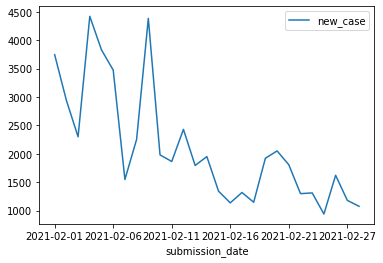

In [125]:
AZ_new_case_Feb.plot(x='submission_date',y='new_case')

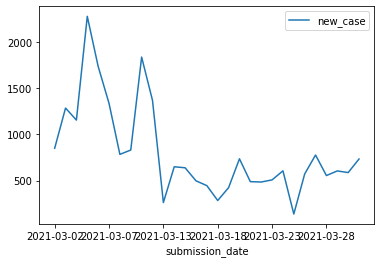

In [126]:
AZ_new_case_Mar.plot(x='submission_date',y='new_case')

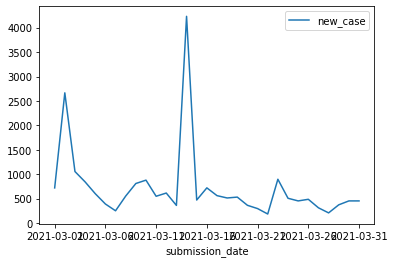

In [127]:
AL_new_case_Mar.plot(x='submission_date',y='new_case')

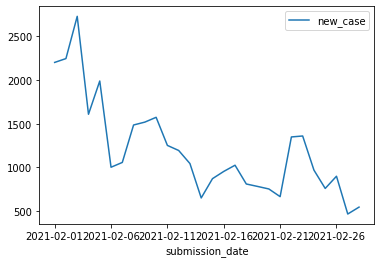

In [128]:
AL_new_case_Feb.plot(x='submission_date',y='new_case')

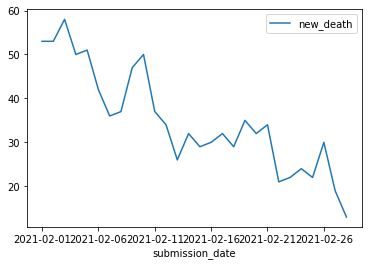

In [130]:
AL_new_death_Feb.plot(x='submission_date',y='new_death')